In [1]:
from fastai.vision.all import *
import fastai
from wwf.vision.timm import *
import timm

In [2]:
!nvidia-smi

Wed Mar 10 15:52:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 48%   84C    P2   212W / 250W |   4444MiB / 10989MiB |     90%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 31%   45C    P8    15W / 250W |     10MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
import torch
torch.cuda.set_device(1)

In [4]:
path = Path('datasetPrueba/')
trainPath = path/'train'
testPath = path/'test'

In [5]:
def getDataBlock(presize=512,size=256):
    return DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = [Resize(presize)],
                 batch_tfms=[*aug_transforms(size=size, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=180,pad_mode=PadMode.Zeros), Normalize.from_stats(*imagenet_stats)])

In [6]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [7]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=3),
    SaveModelCallback(fname='nasnet'),
    MixUp(),
]

In [8]:
learn = timm_learner(dls512, 'mnasnet_100',cbs = callbacks,metrics=[accuracy,Precision(),Recall()]).to_fp16()

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.046417,0.637856,0.688594,0.763713,0.609428,00:20


Better model found at epoch 0 with valid_loss value: 0.6378555297851562.


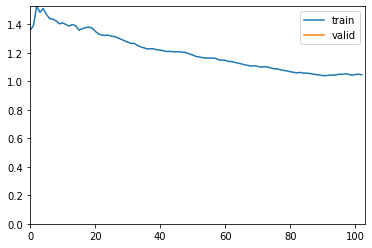

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,0.932820,0.615892,0.691008,0.758527,0.624018,00:22
1,0.939405,0.594156,0.707302,0.763636,0.659933,00:21
2,0.926009,0.581215,0.710320,0.749696,0.692480,00:22
3,0.896273,0.574695,0.707906,0.760563,0.666667,00:22
4,0.908733,0.573376,0.718165,0.771100,0.676768,00:22
5,0.864378,0.577595,0.703681,0.765252,0.647587,00:22
6,0.849396,0.568277,0.712734,0.774834,0.656566,00:22
7,0.860613,0.555555,0.718769,0.774194,0.673401,00:23
8,0.827073,0.551664,0.719372,0.782493,0.662177,00:22
9,0.843940,0.537374,0.722993,0.772040,0.687991,00:20


Better model found at epoch 0 with valid_loss value: 0.6158920526504517.


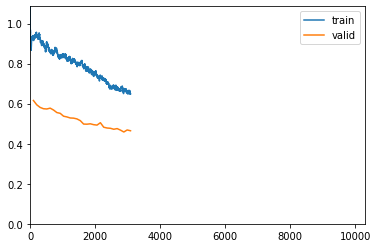

Better model found at epoch 1 with valid_loss value: 0.5941562652587891.
Better model found at epoch 2 with valid_loss value: 0.5812152028083801.
Better model found at epoch 3 with valid_loss value: 0.5746946930885315.
Better model found at epoch 4 with valid_loss value: 0.5733759999275208.
Better model found at epoch 6 with valid_loss value: 0.5682766437530518.
Better model found at epoch 7 with valid_loss value: 0.5555549263954163.
Better model found at epoch 8 with valid_loss value: 0.551663875579834.
Better model found at epoch 9 with valid_loss value: 0.5373736023902893.
Better model found at epoch 10 with valid_loss value: 0.5337581038475037.
Better model found at epoch 11 with valid_loss value: 0.5284509062767029.
Better model found at epoch 12 with valid_loss value: 0.5276174545288086.
Better model found at epoch 13 with valid_loss value: 0.5238122344017029.
Better model found at epoch 14 with valid_loss value: 0.515190064907074.
Better model found at epoch 15 with valid_loss v

In [9]:
learn.fine_tune(100,base_lr=1e-4)

In [10]:
path = Path('datasetCorregido/')
trainPath = path/'train'
testPath = path/'test'

In [11]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=256, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])
dlsTest = dbTest.dataloaders(path,bs=32)

In [12]:
db512 = getDataBlock(512,256)
dls512 = db512.dataloaders(trainPath,bs=64)

In [13]:
learn.freeze()

In [14]:
learn.dls=dls512

In [14]:
#learn.load('hrnet')

SuggestedLRs(lr_min=0.07585775852203369, lr_steep=0.6309573650360107)

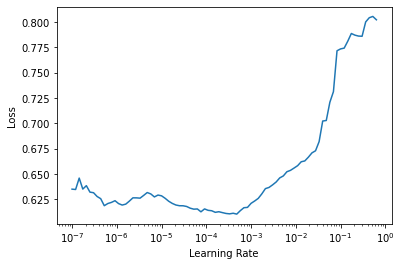

In [16]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.021560,0.739444,0.600917,0.575198,0.685535,00:08


Better model found at epoch 0 with valid_loss value: 0.7394437789916992.


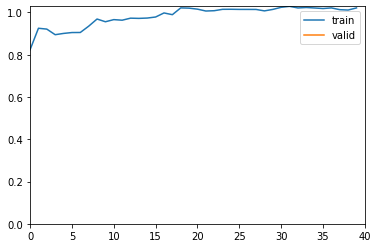

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,time
0,1.017176,0.746180,0.607034,0.577608,0.713836,00:09
1,1.008948,0.734064,0.605505,0.578947,0.691824,00:09
2,1.006409,0.741109,0.607034,0.578811,0.704403,00:09
3,0.985959,0.740590,0.597859,0.569620,0.707547,00:09
4,0.995329,0.726033,0.614679,0.586842,0.701258,00:09
5,0.991902,0.728566,0.611621,0.583333,0.704403,00:09
6,0.995024,0.720678,0.590214,0.564433,0.688679,00:09
7,0.996654,0.713842,0.602446,0.575130,0.698113,00:09
8,0.972125,0.713176,0.600917,0.571072,0.720126,00:09
9,0.968263,0.711559,0.602446,0.572139,0.723270,00:09


Better model found at epoch 0 with valid_loss value: 0.7461797595024109.


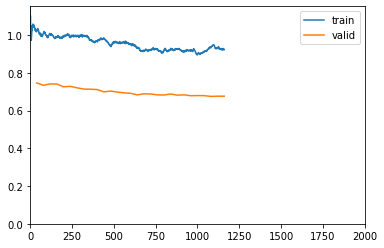

Better model found at epoch 1 with valid_loss value: 0.7340638041496277.
Better model found at epoch 4 with valid_loss value: 0.7260329723358154.
Better model found at epoch 6 with valid_loss value: 0.7206775546073914.
Better model found at epoch 7 with valid_loss value: 0.7138423919677734.
Better model found at epoch 8 with valid_loss value: 0.7131763696670532.
Better model found at epoch 9 with valid_loss value: 0.7115586996078491.
Better model found at epoch 10 with valid_loss value: 0.6991842985153198.
Better model found at epoch 12 with valid_loss value: 0.698316216468811.
Better model found at epoch 13 with valid_loss value: 0.693902313709259.
Better model found at epoch 14 with valid_loss value: 0.6915537118911743.
Better model found at epoch 15 with valid_loss value: 0.6832531094551086.
Better model found at epoch 18 with valid_loss value: 0.6832414269447327.
Better model found at epoch 19 with valid_loss value: 0.6824963688850403.
Better model found at epoch 21 with valid_loss

In [15]:
learn.fine_tune(50,base_lr=1e-5)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.6158612370491028.


(#4) [0.6744378805160522,0.6158612370491028,0.6527196652719666,0.6842105263157895]